# DataScience Project
Monimala Mahato

Estelle Long--Merle


In [54]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Link to dataset : https://github.com/propublica/compas-analysis

In [56]:
# Load the dataset
# Note: The dataset should be in the same directory as this script or provide the full path
df = pd.read_csv("compas-scores-two-years.csv", index_col=0)

In [57]:
# target variable
# "two_year_recid" indicates whether the person was arrested for a crime within two years
y = df["two_year_recid"]
# features
# "decile_score" is the score assigned by the COMPAS algorithm
# "score_text" is a categorical representation of the decile score
X = df.drop(columns=["two_year_recid", "decile_score", "score_text"])

In [58]:
df.shape

(7214, 52)

Dataset contains data on 7214 convicts.

In [59]:
df.columns

Index(['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age',
       'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

The features the dataset contains are :
- name
- first
- last
- compas_screening_date
- sex
- dob
- age
...

In [60]:
df.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [61]:
df.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7214 entries, 1 to 11001
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     7214 non-null   object 
 1   first                    7214 non-null   object 
 2   last                     7214 non-null   object 
 3   compas_screening_date    7214 non-null   object 
 4   sex                      7214 non-null   object 
 5   dob                      7214 non-null   object 
 6   age                      7214 non-null   int64  
 7   age_cat                  7214 non-null   object 
 8   race                     7214 non-null   object 
 9   juv_fel_count            7214 non-null   int64  
 10  decile_score             7214 non-null   int64  
 11  juv_misd_count           7214 non-null   int64  
 12  juv_other_count          7214 non-null   int64  
 13  priors_count             7214 non-null   int64  
 14  days_b_screening_arrest  690

## Missing Values

In [63]:
nan_counts = df.isna().sum()
print(nan_counts[nan_counts > 0])

days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_desc                29
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_out                 4898
violent_recid              7214
vr_case_number             6395
vr_charge_degree           6395
vr_offense_date            6395
vr_charge_desc             6395
in_custody                  236
out_custody                 236
dtype: int64


## Features extraction

In [64]:
categorical_features = ['sex', #Male/Female
                        'race', #African-American, Caucasian, Hispanic, Other, Asian, Native American
                        'c_charge_degree', #F (Felony), M (Misdemeanor)
                        #'c_charge_desc',
                        'type_of_assessment']
quantitative_features = ['age', 
                         'juv_fel_count', 
                         'juv_misd_count', 
                         'juv_other_count', 
                         'priors_count', 
                         'days_b_screening_arrest']
ordinal_features = ['age_cat',
                    'score_text',
                    'decile_score']

X = df[categorical_features + quantitative_features].values
X_quantitative = df[quantitative_features].values
X_categorical = df[categorical_features].values
X_ordinal = df[ordinal_features].values

Distribution of quantitative features

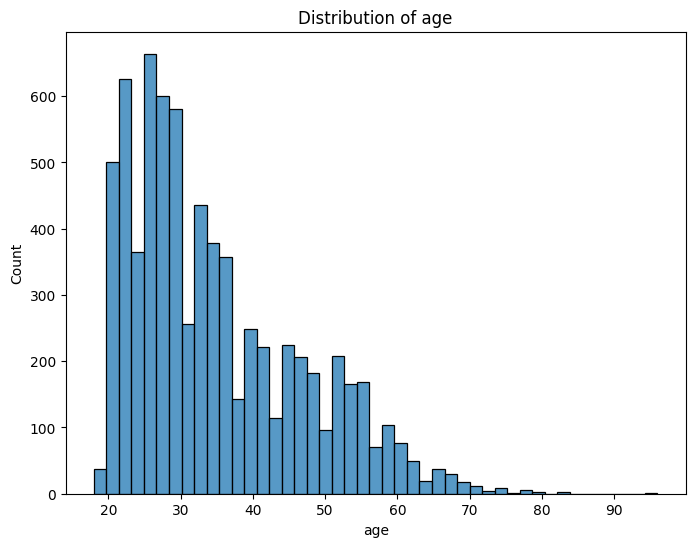

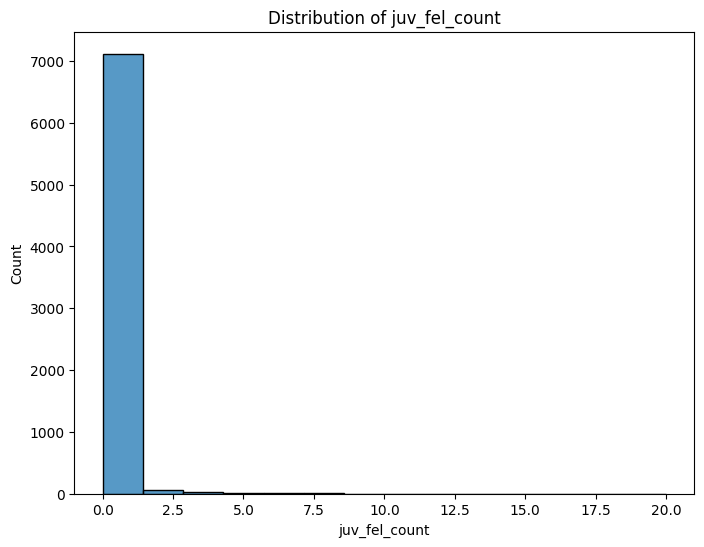

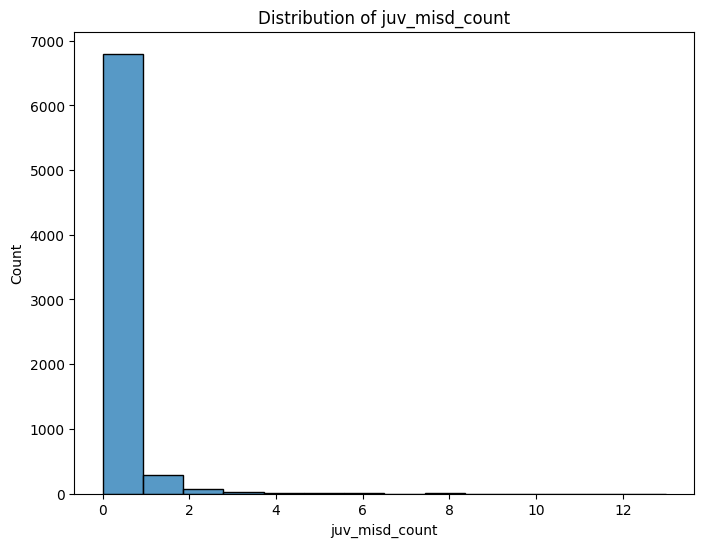

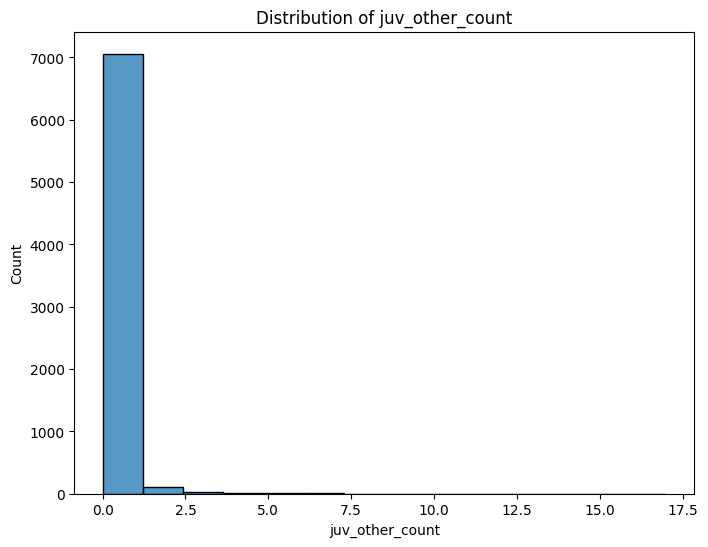

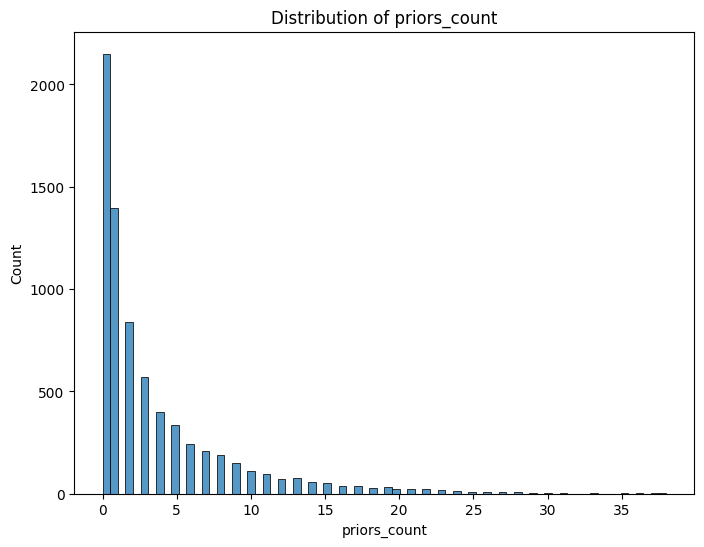

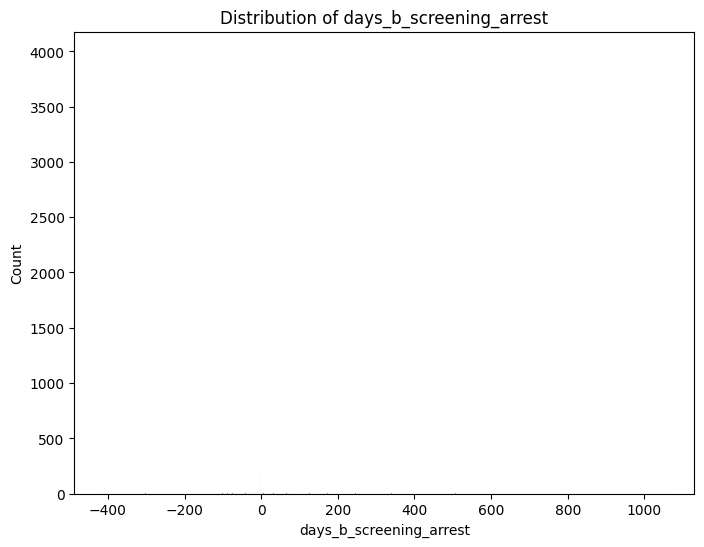

In [65]:
for i, col in enumerate(df[quantitative_features].columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[quantitative_features],x=col)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"figures/histogram_{col}.png")
    plt.show()

Distribution of categorical features

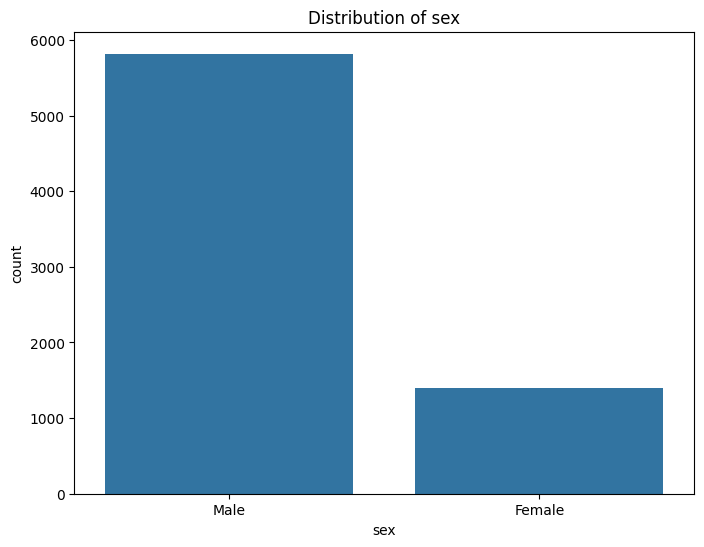

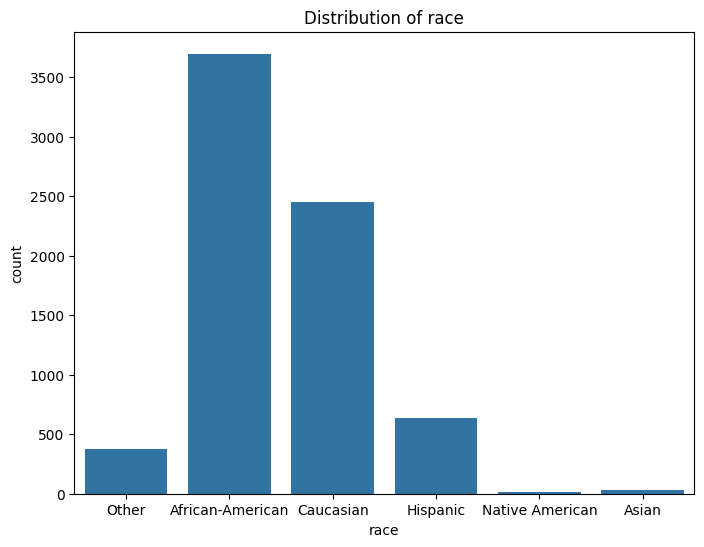

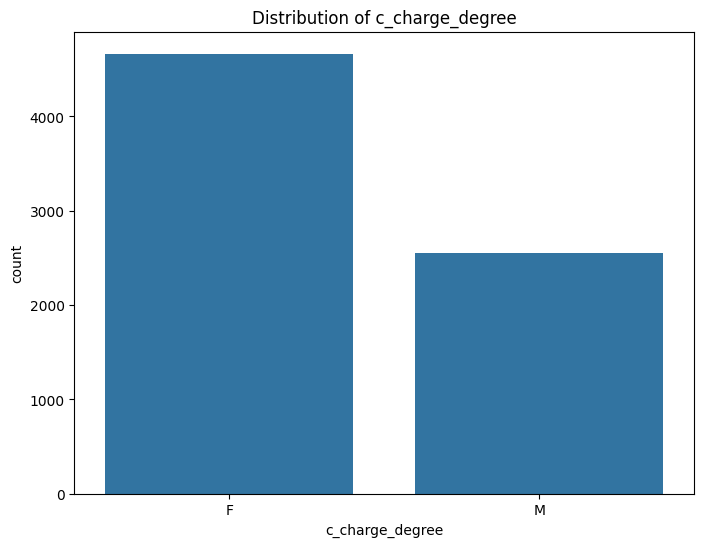

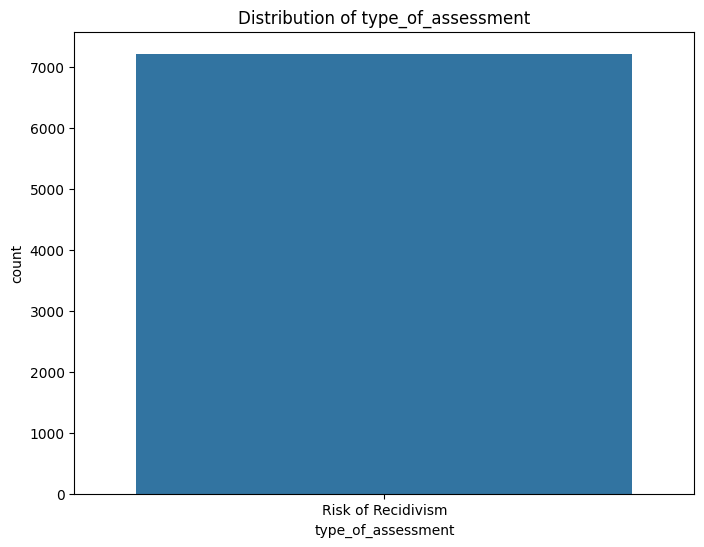

In [66]:
for i, col in enumerate(df[categorical_features].columns):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df[categorical_features],x=col)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"figures/countplot_{col}.png")
    plt.show()

Distribution (histogram) of decile_score per race

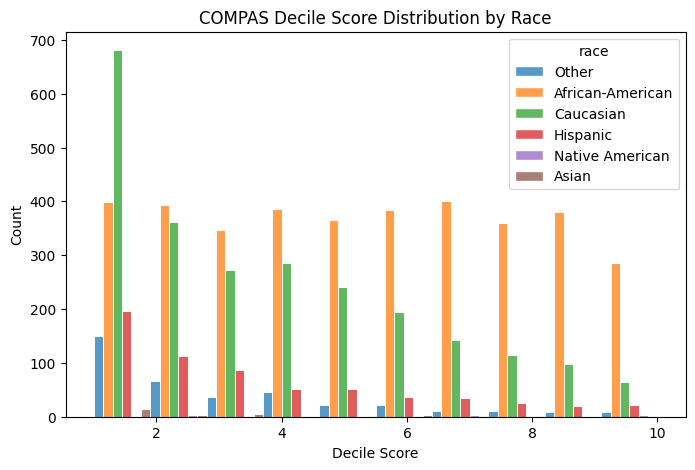

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="decile_score",
    hue="race",
    multiple="dodge",
    bins=10,
    edgecolor="w"
)
plt.title("COMPAS Decile Score Distribution by Race")
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.savefig("figures/decile_score_distribution by race.png")
plt.show()

Distribution (histogram) of decile_score per gender

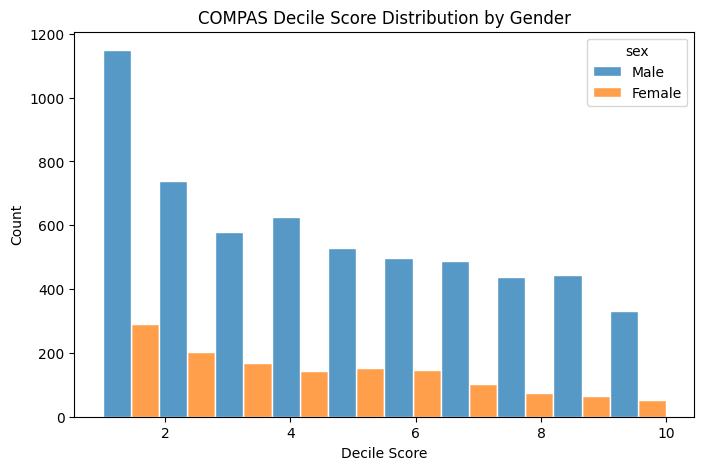

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="decile_score",
    hue="sex",
    multiple="dodge",
    bins=10,
    edgecolor="w"
)
plt.title("COMPAS Decile Score Distribution by Gender")
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.savefig("figures/decile_score_sex.png")
plt.show()

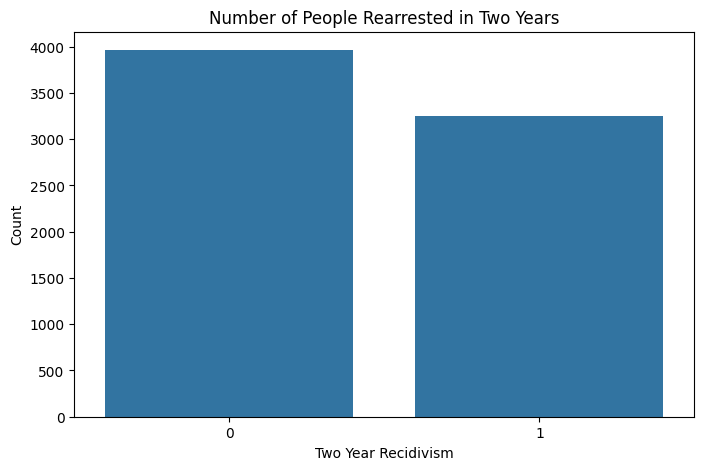

In [69]:
#number of people rearrested
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="two_year_recid")
plt.title("Number of People Rearrested in Two Years")
plt.xlabel("Two Year Recidivism")
plt.ylabel("Count")
plt.savefig("figures/recidivism_count.png")

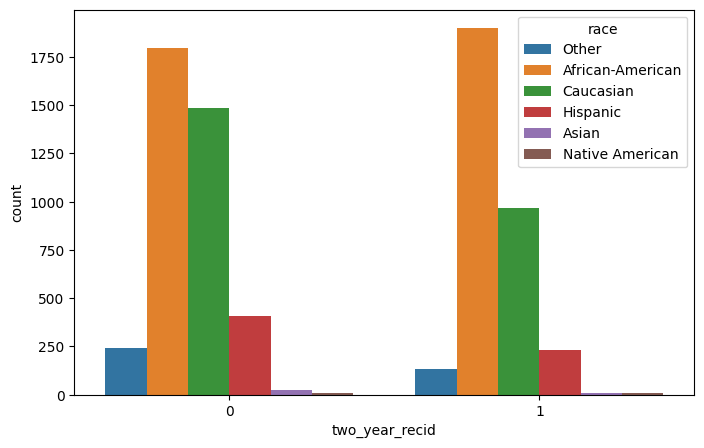

In [70]:
#number of people rearrested by race
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="two_year_recid", hue="race")
plt.savefig("figures/recidivism_count_by_race.png")

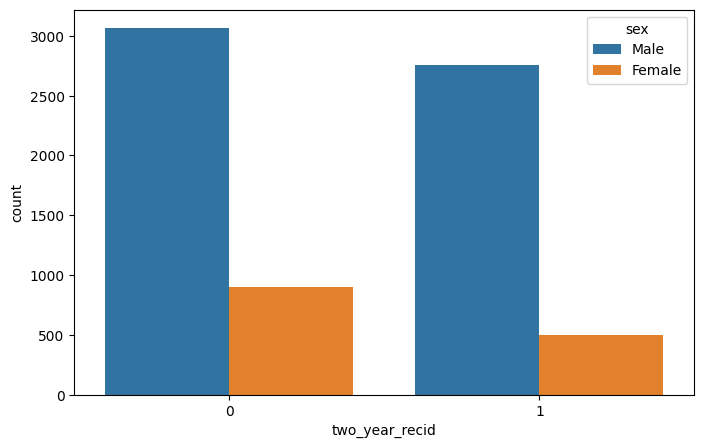

In [71]:
#number of people rearrested by gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="two_year_recid", hue="sex")
plt.savefig("figures/recidivism_count_by_sex.png")